In [ ]:
from fastai2.vision.all import *
from animal_sounds import *

In [ ]:
source = sounds_source()

In [ ]:
dblock = DataBlock((ImageBlock(PILImageBW), CategoryBlock), get_items=get_files,
                    get_x=get_spec, get_y=parent_label,
                    batch_tfms=[Normalize()],
                    splitter=RandomSplitter(seed=42))

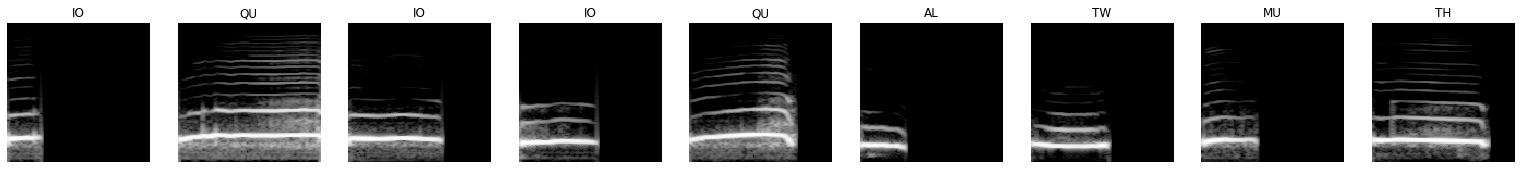

In [4]:
dls = dblock.dataloaders(source, bs=64)
dls.show_batch(nrows=1)

In [5]:
arch = lambda pretrained: xresnet18(pretrained, c_in=1)
learn = cnn_learner(dls, arch, metrics=accuracy, pretrained=False)

In [6]:
learn.load_encoder('rawenc-dur')

In [7]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.865939,0.918439,0.696637,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.555126,0.288356,0.914207,00:13


### 1-1 (freezed-unfreezed)
| model | acc | ptrain | BW | ptrain-dur |
| ----- | --- | ------ | -- | ---------- |
| resnet18 | 0.975 | yes | yes | no |
| resnet18 | 0.978 | yes | yes | yes |
| xresnet18 | 0.912 | no | yes | yes |
| xresnet18 | 0.950 | no | yes | no |


### 1-5
| model | acc | ptrain | BW | ptrain-dur |
| ----- | --- | ------ | -- | ---------- |
| xresnet18 | 0.965 | no | yes | no |
| xresnet18 | 0.957 | no | yes | yes |